<a href="https://colab.research.google.com/github/yumingh4/MAT1856-APM466/blob/main/apm466_assignment_1_current_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import os

from scipy.optimize import fsolve

from time import process_time

import pandas as pd
from datetime import datetime, timedelta
from scipy.optimize import fsolve
from sympy import symbols, solve
import math



# Make the ten bonds into tuples of the form: (id, close price day 1, close price day 2,
# close price day 3, close price day 4, close price day 5, close price day 6, close price day 7,
# close price day 8, close price day 9, close price day 10, annual coupon rate, issue date, maturity date)

# The ten bonds are have semi-annual coupon payments

# Coupon start dates here were March 1st and last one is February 28th

march_2025 = ('CA135087K528', 99.73, 99.73,	99.74, 99.73, 99.74, 99.73,	99.73, 99.77, 99.78, 99.8, 0.0125, datetime(2019, 10, 11), datetime(2025, 3, 1))
march_2026 = ('CA135087L518', 96.99, 96.98,	96.97, 97, 96.9, 96.91,	96.8, 96.9,	97.01, 97.06, 0.0025, datetime(2020, 10, 9), datetime(2026, 3, 1))
march_2027 = ('CA135087M847', 96.62, 96.59,	96.58, 96.63, 96.39, 96.28,	96.19,	96.36, 96.6, 96.64, 0.0125, datetime(2021, 10, 15),	datetime(2027, 3, 1))
march_2028 = ('CA135087P576', 101.82, 101.82, 101.7, 101.72, 101.52, 101.26, 101.02, 101.24, 101.58, 101.65, 0.035, datetime(2022, 10, 21), datetime(2028, 3, 1))
march_2029 = ('CA135087Q988', 104.07, 104.01, 103.9, 103.87, 103.53, 103.29, 102.99, 103.24, 103.8, 103.9, 0.04, datetime(2023, 10, 13), datetime(2029, 3, 1))
march_2030 = ('CA135087S471', 98.81, 98.6, 98.53, 98.54, 97.96, 97.61, 97.38, 97.76, 98.4, 98.47, 0.0275, datetime(2024, 10, 3), datetime(2030, 3, 1))

march_bonds = [march_2025, march_2026, march_2027, march_2028, march_2029, march_2030]

# Coupon start dates here were September 1st and the last one is August 31st

sept_2025 = ('CA135087K940', 98.4, 98.41, 98.4, 98.42, 98.37, 98.36, 98.36, 98.4, 98.47, 98.5, 0.005,	datetime(2020, 4, 3),	datetime(2025, 9, 1))
sept_2026 = ('CA135087L930', 97.01, 96.99, 97, 97.03, 96.86, 96.77, 96.71, 96.85, 97.03, 97.07,	0.01, datetime(2021, 4, 16),	datetime(2026, 9, 1))
sept_2027 = ('CA135087N837', 99.63, 99.56, 99.54, 99.58, 99.27, 99.13, 99.02, 99.2,	99.5, 99.53, 0.0275,	datetime(2022, 5, 13),	datetime(2027, 9, 1))
sept_2028 = ('CA135087Q491', 101.1, 101.14, 100.99, 100.94, 100.79, 100.49, 100.19, 100.42, 100.92, 101.02, 0.0325, datetime(2023, 4, 21), datetime(2028,9,1))
sept_2029 = ('CA135087R895', 102.22, 102.14, 102.04, 101.98, 101.59, 101.28, 101, 101.27, 101.85, 101.97, 0.035,	datetime(2024, 4, 8), datetime(2029, 9, 1))

sept_bonds = [sept_2025, sept_2026, sept_2027, sept_2028, sept_2029]

all_bonds = [march_2025, sept_2025, march_2026, sept_2026, march_2027, sept_2027, march_2028, sept_2028, march_2029, sept_2029, march_2030]

# Number of days since last coupon payment since Jan 17th

# For the all the bonds, their last payment was September 1st, 2024

days_since_last_payment1 = datetime(2025, 1, 6) - datetime(2024, 9, 1)
days_since_last_payment2 = datetime(2025, 1, 7) - datetime(2024, 9, 1)
days_since_last_payment3 = datetime(2025, 1, 8) - datetime(2024, 9, 1)
days_since_last_payment4 = datetime(2025, 1, 9) - datetime(2024, 9, 1)
days_since_last_payment5 = datetime(2025, 1, 10) - datetime(2024, 9, 1)
days_since_last_payment6 = datetime(2025, 1, 13) - datetime(2024, 9, 1)
days_since_last_payment7 = datetime(2025, 1, 14) - datetime(2024, 9, 1)
days_since_last_payment8 = datetime(2025, 1, 15) - datetime(2024, 9, 1)
days_since_last_payment9 = datetime(2025, 1, 16) - datetime(2024, 9, 1)
days_since_last_payment10 = datetime(2025, 1, 17) - datetime(2024, 9, 1)

days_since_last_payment = [days_since_last_payment1, days_since_last_payment2, days_since_last_payment3, days_since_last_payment4, days_since_last_payment5, days_since_last_payment6, days_since_last_payment7, days_since_last_payment8, days_since_last_payment9, days_since_last_payment10]

# We get 127, 128, 129, 130, 131, 134, 135, 136, 137, 138 days

# We want dirty price for all of them (110, 10 for each bond), recall Dirty Price = Accrued Interest + Clean Price
# Note that denomination for the 11 bonds is 100. This is the face value.
# Accrued interest = 100 * (n/365)*Annual Coupon Rate and n = days since last coupon payment
# Clean Price is the Close Price on each day


In [ ]:
# day1 dirty prices

lst_dirty_prices1 = []
for bond in all_bonds:
    coupon_rate = bond[11]
    clean_price = bond[1]
    accrued_interest = 100 * (coupon_rate / 365) * 127
    dirty_price = clean_price + accrued_interest  # Dirty price = clean price + accrued interest
    lst_dirty_prices1.append(dirty_price)

lst_dirty_prices2 = []
for bond in all_bonds:
    coupon_rate = bond[11]
    clean_price = bond[2]
    accrued_interest = 100 * (coupon_rate / 365) * 128
    dirty_price = clean_price + accrued_interest  # Dirty price = clean price + accrued interest
    lst_dirty_prices2.append(dirty_price)

lst_dirty_prices3 = []
for bond in all_bonds:
    coupon_rate = bond[11]
    clean_price = bond[3]
    accrued_interest = 100 * (coupon_rate / 365) * 129
    dirty_price = clean_price + accrued_interest  # Dirty price = clean price + accrued interest
    lst_dirty_prices3.append(dirty_price)

lst_dirty_prices4 = []
for bond in all_bonds:
    coupon_rate = bond[11]
    clean_price = bond[4]
    accrued_interest = 100 * (coupon_rate / 365) * 130
    dirty_price = clean_price + accrued_interest  # Dirty price = clean price + accrued interest
    lst_dirty_prices4.append(dirty_price)

lst_dirty_prices5 = []
for bond in all_bonds:
    coupon_rate = bond[11]
    clean_price = bond[5]
    accrued_interest = 100 * (coupon_rate / 365) * 131
    dirty_price = clean_price + accrued_interest  # Dirty price = clean price + accrued interest
    lst_dirty_prices5.append(dirty_price)

lst_dirty_prices6 = []
for bond in all_bonds:
    coupon_rate = bond[11]
    clean_price = bond[6]
    accrued_interest = 100 * (coupon_rate / 365) * 134
    dirty_price = clean_price + accrued_interest  # Dirty price = clean price + accrued interest
    lst_dirty_prices6.append(dirty_price)

lst_dirty_prices7 = []
for bond in all_bonds:
    coupon_rate = bond[11]
    clean_price = bond[7]
    accrued_interest = 100 * (coupon_rate / 365) * 135
    dirty_price = clean_price + accrued_interest  # Dirty price = clean price + accrued interest
    lst_dirty_prices7.append(dirty_price)

lst_dirty_prices8 = []
for bond in all_bonds:
    coupon_rate = bond[11]
    clean_price = bond[8]
    accrued_interest = 100 * (coupon_rate / 365) * 136
    dirty_price = clean_price + accrued_interest  # Dirty price = clean price + accrued interest
    lst_dirty_prices8.append(dirty_price)

lst_dirty_prices9 = []
for bond in all_bonds:
    coupon_rate = bond[11]
    clean_price = bond[9]
    accrued_interest = 100 * (coupon_rate / 365) * 137
    dirty_price = clean_price + accrued_interest  # Dirty price = clean price + accrued interest
    lst_dirty_prices9.append(dirty_price)

lst_dirty_prices10 = []
for bond in all_bonds:
    coupon_rate = bond[11]
    clean_price = bond[10]
    accrued_interest = 100 * (coupon_rate / 365) * 138
    dirty_price = clean_price + accrued_interest  # Dirty price = clean price + accrued interest
    lst_dirty_prices10.append(dirty_price)

lst_all_dirty = [lst_dirty_prices1, lst_dirty_prices2, lst_dirty_prices3, lst_dirty_prices4, lst_dirty_prices5, lst_dirty_prices6, lst_dirty_prices7, lst_dirty_prices8, lst_dirty_prices9, lst_dirty_prices10]

# Want to find r = ytm for all the bonds

# Get remaining coupon payments for each bond

# For March bonds, the remaining payments are 1, 3, 5, 7, 9, 11 respectively.

march_payments_left = [1, 3, 5, 7, 9, 11]

# For September bonds, the remaining coupon payments are 2, 4, 6, 8, 10 respectively.

sept_payments_left = [2, 4, 6, 8, 10]

all_payments_left = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]



In [ ]:
import math
from scipy.optimize import fsolve

import math
from sympy import symbols, Eq, exp, nsolve
from datetime import datetime, timedelta

lst_all_ytm_total = []
start_date = [datetime(2025, 1, 6), datetime(2025, 1, 7),
                     datetime(2025, 1, 8), datetime(2025, 1, 9),
                     datetime(2025, 1, 10), datetime(2025, 1, 13),
                     datetime(2025, 1, 14), datetime(2025, 1, 15),
              datetime(2025, 1, 16), datetime(2025, 1, 17)]
j = 0

for day_index, lst_dirty_prices in enumerate(lst_all_dirty):  # Loop through each day
    lst_all_ytm = []
    start_times = []
    for i, bond in enumerate(all_bonds):
        P = lst_dirty_prices[i]
        each_coupon_payment = bond[11] * 100 / 2
        number_payments_left = all_payments_left[i]
        equation = 0
        r = symbols('r')

        # Build the equation using sympy.exp
        for t in range(1, number_payments_left + 1):
            payment_date = datetime(2025, 3, 1) + timedelta(days=(t - 1) * 183)  # Calculate coupon dates
            equation += each_coupon_payment * exp(-r * (payment_date - start_date[j]).days / 365)

        equation += 100 * exp(-r * (bond[-1] - start_date[j]).days / 365)  # Add the face value discounted

        # Subtract the dirty price to equate to 0
        equation = Eq(equation, P)

        try:
            # Use nsolve to find the root numerically
            initial_guess = 0.01
            ytm = nsolve(equation, r, initial_guess)
            lst_all_ytm.append(float(ytm))
        except Exception as e:
            print(f"Error solving for bond {bond[0]} on day {day_index + 1}: {e}")
            lst_all_ytm.append(None)

    lst_all_ytm_total.append(lst_all_ytm)  # Add the YTM list for this day to the total
    j += 1
import matplotlib.pyplot as plt

maturities = [
    "Mar 2025", "Sep 2025", "Mar 2026", "Sep 2026",
    "Mar 2027", "Sep 2027", "Mar 2028", "Sep 2028",
    "Mar 2029", "Sep 2029", "Mar 2030"
]




In [ ]:
print(lst_all_ytm_total)


[[0.03097493625241832, 0.029734065098714964, 0.02915104746254897, 0.028452453776446444, 0.028654926037531343, 0.028744319138524488, 0.028713297272873875, 0.029061300981544316, 0.02929668797322551, 0.029608606173778296, 0.02978781853192751], [0.03132391232931775, 0.029681793853741915, 0.029304836038149935, 0.028608661137920766, 0.028821631523405826, 0.02901891234515967, 0.028708458971446492, 0.028945301949477354, 0.02943946896084765, 0.02978635246220941, 0.03022921760973838], [0.030985634365861693, 0.02994347792097243, 0.029459371550858926, 0.028576485459602036, 0.028891142458626156, 0.02909883961194274, 0.029095650205813464, 0.029370427968087583, 0.029706877669456247, 0.030009638463601638, 0.030377710634884134], [0.03206294558832311, 0.029733809495415858, 0.029252494056546632, 0.02841809781730588, 0.028667567153259188, 0.028944298038586006, 0.029025698448290376, 0.029511181192704038, 0.02977562759574065, 0.030142875731231495, 0.03035826443774915], [0.031725984055816066, 0.0306321929511

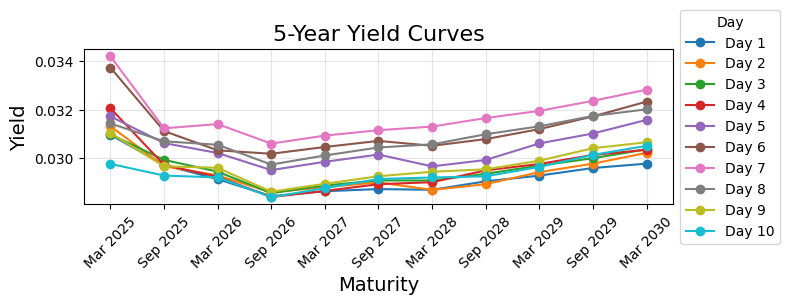

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Plotting
plt.figure(figsize=(8, 3))

for day_idx, yields in enumerate(lst_all_ytm_total, start=1):
    # Plot each day
    plt.plot(maturities, yields, marker='o', label=f'Day {day_idx}')

# Customize the plot
plt.title("5-Year Yield Curves", fontsize=16)
plt.xlabel("Maturity", fontsize=14)
plt.ylabel("Yield", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Day", fontsize=10, loc="center left", bbox_to_anchor=(1, 0.5))
plt.grid(alpha=0.3)

plt.savefig("yield_curve_2.pdf", bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

from google.colab import files
files.download("yield_curve_2.pdf")


In [ ]:
import numpy as np
import plotly.graph_objects as go

In [ ]:
# Back out spot rates

# so we don't have to run the above code



# Nested list of dirty prices
lst_all_dirty = [
    [100.16493150684931, 98.57397260273973, 97.07698630136986, 97.35794520547945, 97.05493150684931, 100.58684931506849, 103.03780821917807, 102.23082191780821, 105.4617808219178, 103.43780821917808, 99.7668493150685],
    [100.16835616438357, 98.58534246575343, 97.06767123287672, 97.34068493150684, 97.02835616438357, 100.52438356164384, 103.04739726027397, 102.27972602739726, 105.4127397260274, 103.36739726027398, 99.56438356164384],
    [100.1817808219178, 98.57671232876713, 97.05835616438355, 97.35342465753425, 97.0217808219178, 100.51191780821918, 102.93698630136987, 102.1386301369863, 105.313698630137, 103.27698630136987, 99.50191780821918],
    [100.17520547945206, 98.59808219178082, 97.08904109589041, 97.38616438356165, 97.07520547945205, 100.55945205479452, 102.96657534246575, 102.09753424657534, 105.29465753424658, 103.22657534246576, 99.51945205479453],
    [100.18863013698629, 98.54945205479453, 96.98972602739727, 97.21890410958905, 96.8386301369863, 100.25698630136986, 102.77616438356164, 101.95643835616438, 104.96561643835616, 102.84616438356164, 98.94698630136986],
    [100.18890410958905, 98.54356164383562, 97.0017808219178, 97.13712328767123, 96.73890410958904, 100.13958904109589, 102.54493150684932, 101.6831506849315, 104.75849315068494, 102.56493150684932, 98.61958904109589],
    [100.19232876712329, 98.54493150684931, 96.89246575342466, 97.07986301369863, 96.65232876712328, 100.03712328767124, 102.31452054794521, 101.39205479452055, 104.46945205479452, 102.29452054794521, 98.39712328767123],
    [100.23575342465753, 98.58630136986302, 96.9931506849315, 97.22260273972603, 96.82575342465753, 100.22465753424657, 102.54410958904108, 101.63095890410959, 104.7304109589041, 102.57410958904109, 98.78465753424658],
    [100.24917808219178, 98.65767123287671, 97.10383561643836, 97.40534246575342, 97.06917808219177, 100.53219178082192, 102.89369863013698, 102.13986301369863, 105.30136986301369, 103.16369863013698, 99.43219178082192],
    [100.27260273972603, 98.68904109589042, 97.15452054794521, 97.44808219178081, 97.11260273972603, 100.56972602739727, 102.97328767123288, 102.24876712328766, 105.4123287671233, 103.29328767123287, 99.50972602739726]
]



In [ ]:
from scipy.optimize import root

# Dates the data was collected
start_dates = [
    datetime(2025, 1, 6), datetime(2025, 1, 7), datetime(2025, 1, 8),
    datetime(2025, 1, 9), datetime(2025, 1, 10), datetime(2025, 1, 13),
    datetime(2025, 1, 14), datetime(2025, 1, 15), datetime(2025, 1, 16),
    datetime(2025, 1, 17)
]

# Bond maturities (sorted by maturity date)
maturity_dates = [
    datetime(2025, 3, 1), datetime(2025, 9, 1), datetime(2026, 3, 1),
    datetime(2026, 9, 1), datetime(2027, 3, 1), datetime(2027, 9, 1),
    datetime(2028, 3, 1), datetime(2028, 9, 1), datetime(2029, 3, 1),
    datetime(2029, 9, 1), datetime(2030, 3, 1)
]

# Annual coupon rates for each bond
coupon_rates = [0.0125, 0.005, 0.0025, 0.01, 0.0125, 0.0275, 0.035, 0.0325, 0.04, 0.035, 0.0275]


# Function to calculate time to maturity in years
def time_to_maturity(start_date, maturity_date):
    return (maturity_date - start_date).days / 365

# Function to calculate spot rates for a given day
def calculate_spot_rates(dirty_prices, start_date, maturity_dates, coupon_rates):
    spot_rates = []
    for i, (dirty_price, maturity_date, coupon_rate) in enumerate(zip(dirty_prices, maturity_dates, coupon_rates)):
        n = time_to_maturity(start_date, maturity_date)  # Time to maturity in years
        if i == 0:
            # For the first bond, calculate the spot rate directly
            F = 100
            C = coupon_rate * 100 / 2
            spot_rate = ((F + C) / dirty_price) ** (1 / n) - 1
        else:
            # For subsequent bonds, use a numerical solver
            def equation(r):
                pv = 0
                for j in range(i):
                    prev_n = time_to_maturity(start_date, maturity_dates[j])
                    pv += (coupon_rate * 100 / 2) / (1 + spot_rates[j]) ** prev_n
                # Add the final cash flow (face value + last coupon)
                pv += (100 + coupon_rate * 100 / 2) / (1 + r) ** n
                return pv - dirty_price

            # Solve for the spot rate
            result = root(equation, x0=0.05)  # Initial guess for the spot rate
            spot_rate = result.x[0]

        spot_rates.append(spot_rate)
    return spot_rates





In [ ]:
for day, prices in enumerate(lst_all_dirty):
    start_date = start_dates[day]
    spot_rates = calculate_spot_rates(prices, start_date, maturity_dates, coupon_rates)
    print(f"Day {day + 1} Spot Rates: {spot_rates}")


Day 1 Spot Rates: [0.031459651318202164, 0.03017948144850133, 0.029579354822829557, 0.028854703361216993, 0.029065927458512403, 0.029158385659801847, 0.029125618938141917, 0.029503843853579268, 0.02976690665277501, 0.030104884014978447, 0.030287305739299115]
Day 2 Spot Rates: [0.03181966887590271, 0.03012540994290773, 0.02973783001309948, 0.029015808743685374, 0.02923797592961285, 0.029445254271712767, 0.029111502332820925, 0.02937107089411611, 0.029919599973158868, 0.030295122258096448, 0.030765558221249694]
Day 3 Spot Rates: [0.031470686049589025, 0.030395367156398838, 0.029896981396180192, 0.028981590873007078, 0.02930956002475515, 0.029527925946884703, 0.02952549117363734, 0.029823194669017592, 0.030198376195180957, 0.030524356478135922, 0.03091283670766775]
Day 4 Spot Rates: [0.032582499772479734, 0.030178630214906608, 0.029683740178504704, 0.028818377356313832, 0.02907849805052729, 0.029369259484028555, 0.02945805955630868, 0.029983241413823886, 0.030279887366668534, 0.0306750143

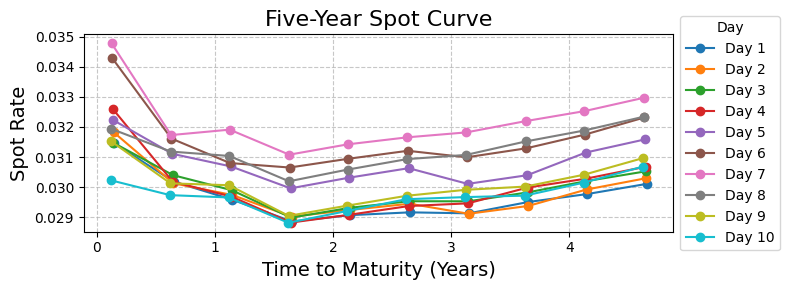

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt

# Function to extract five-year spot rates and corresponding maturities
def extract_five_year_curve(spot_rates, maturity_dates, start_date):
    five_year_spot_rates = []
    five_year_maturities = []
    for spot_rate, maturity_date in zip(spot_rates, maturity_dates):
        maturity_years = (maturity_date - start_date).days / 365
        if maturity_years <= 5:
            five_year_spot_rates.append(spot_rate)
            five_year_maturities.append(maturity_years)
    return five_year_maturities, five_year_spot_rates

# Plot the five-year spot curves for each day
plt.figure(figsize=(8, 3))

for day, prices in enumerate(lst_all_dirty):
    start_date = start_dates[day]
    spot_rates = calculate_spot_rates(prices, start_date, maturity_dates, coupon_rates)
    maturities, rates = extract_five_year_curve(spot_rates, maturity_dates, start_date)

    # Plot the spot curve for this day
    plt.plot(maturities, rates, marker = 'o', label=f'Day {day + 1}')

# Customize the graph
plt.title('Five-Year Spot Curve', fontsize=16)
plt.xlabel('Time to Maturity (Years)', fontsize=14)
plt.ylabel('Spot Rate', fontsize=14)
plt.legend(title='Day', fontsize=10, loc="center left", bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# save
plt.savefig("spot_curve.pdf", bbox_inches='tight')


# Show the graph
plt.show()

from google.colab import files
files.download("spot_curve.pdf")


In [ ]:
# Calculating Forward rates



In [ ]:
# Spot rates for each day (from your output) since we need to calculate interpolated spot rates first
spot_rates = [
    [0.031459651318202164, 0.03017948144850133, 0.029579354822829557, 0.028854703361216993, 0.029065927458512403, 0.029158385659801847, 0.029125618938141917, 0.029503843853579268, 0.02976690665277501, 0.030104884014978447, 0.030287305739299115],
    [0.03181966887590271, 0.03012540994290773, 0.02973783001309948, 0.029015808743685374, 0.02923797592961285, 0.029445254271712767, 0.029111502332820925, 0.02937107089411611, 0.029919599973158868, 0.030295122258096448, 0.030765558221249694],
    [0.031470686049589025, 0.030395367156398838, 0.029896981396180192, 0.028981590873007078, 0.02930956002475515, 0.029527925946884703, 0.02952549117363734, 0.029823194669017592, 0.030198376195180957, 0.030524356478135922, 0.03091283670766775],
    [0.032582499772479734, 0.030178630214906608, 0.029683740178504704, 0.028818377356313832, 0.02907849805052729, 0.029369259484028555, 0.02945805955630868, 0.029983241413823886, 0.030279887366668534, 0.030675014321252827, 0.030891687068190808],
    [0.03223461780562897, 0.03110523912152955, 0.03068562310598246, 0.029957598181299106, 0.03031277274117621, 0.030627789589804128, 0.03010619438287702, 0.03039334640113606, 0.03114862274638469, 0.03158802239329986, 0.03218137959837902],
    [0.03430511044555451, 0.03161318891956619, 0.03079862356864599, 0.030650055514782466, 0.030940903169287097, 0.03120623724267053, 0.030990446787323378, 0.03128894911817423, 0.031744918219604644, 0.032314441007547365, 0.03296070943954403],
    [0.034783105621017274, 0.03173012065925261, 0.03191020843085198, 0.031077527167293582, 0.03142169657001678, 0.03165507103301565, 0.03181890094958327, 0.03219555071186901, 0.03252656582795237, 0.03297199217623747, 0.03345757331196191],
    [0.031936324790084125, 0.031180846988074478, 0.03103408937400456, 0.030191954134410417, 0.030580392914971673, 0.03092985204930018, 0.031069183032000642, 0.031516663493599856, 0.03188103593149393, 0.03234043124786226, 0.03261714603081753],
    [0.03152727796053689, 0.03012316187181654, 0.030060513935970895, 0.02904169809812342, 0.029381533611390127, 0.029710018316479056, 0.029908466856565237, 0.030015246943989295, 0.030409591546629235, 0.030967024826594056, 0.031212983434719583],
    [0.030227005909640337, 0.029730977832979396, 0.02965392262414683, 0.028812358763962556, 0.029201839098622333, 0.02959541961949629, 0.029666130806618587, 0.02971457347885752, 0.030144739173807975, 0.030681085417349062, 0.03106955132356152]
]



In [ ]:
maturity_dates = [
    datetime(2025, 3, 1), datetime(2025, 9, 1), datetime(2026, 3, 1),
    datetime(2026, 9, 1), datetime(2027, 3, 1), datetime(2027, 9, 1),
    datetime(2028, 3, 1), datetime(2028, 9, 1), datetime(2029, 3, 1),
    datetime(2029, 9, 1), datetime(2030, 3, 1)
]

target_dates = [[datetime(2026, 1, 6), datetime(2027, 1, 6), datetime(2028, 1, 6), datetime(2029, 1, 6), datetime(2030, 1, 6)],
 [datetime(2026, 1, 7), datetime(2027, 1, 7), datetime(2028, 1, 7), datetime(2029, 1, 7), datetime(2030, 1, 7)],
  [datetime(2026, 1, 8), datetime(2027, 1, 8), datetime(2028, 1, 8), datetime(2029, 1, 8), datetime(2030, 1, 8)],
   [datetime(2026, 1, 9), datetime(2027, 1, 9), datetime(2028, 1, 9), datetime(2029, 1, 9), datetime(2030, 1, 9)],
    [datetime(2026, 1, 10), datetime(2027, 1, 10), datetime(2028, 1, 10), datetime(2029, 1, 10), datetime(2030, 1, 10)],
     [datetime(2026, 1, 13), datetime(2027, 1, 13), datetime(2028, 1, 13), datetime(2029, 1, 13), datetime(2030, 1, 13)],
      [datetime(2026, 1, 14), datetime(2027, 1, 14), datetime(2028, 1, 14), datetime(2029, 1, 14), datetime(2030, 1, 14)],
       [datetime(2026, 1, 15), datetime(2027, 1, 15), datetime(2028, 1, 15), datetime(2029, 1, 15), datetime(2030, 1, 15)],
        [datetime(2026, 1, 16), datetime(2027, 1, 16), datetime(2028, 1, 16), datetime(2029, 1, 16), datetime(2030, 1, 16)],
         [datetime(2026, 1, 17), datetime(2027, 1, 17), datetime(2028, 1, 17), datetime(2029, 1, 17), datetime(2030, 1, 17)]]

total_interpolated = []

for i in range(10):
  target = target_dates[i]
  interpolated = []
  for j in range(5):
    target_date = target[j]
    slope = (spot_rates[i][2 * j + 2] - spot_rates[i][2 * j + 1])/(maturity_dates[2 * j + 2] - maturity_dates[2 * j + 1]).days
    spot_rate = slope * (target_date - maturity_dates[2 * j + 1]).days + spot_rates[i][2 * j + 1]
    interpolated.append(spot_rate)
  total_interpolated.append(interpolated)

print(total_interpolated)

[[0.029758398125516162, 0.029002910324512667, 0.029135520969412774, 0.02968842382870556, 0.030232881578452064], [0.02985132026878919, 0.029172921449755633, 0.02921052763337125, 0.029758980961063476, 0.030627806254138523], [0.030040164045524776, 0.02921533684303747, 0.029526200201011574, 0.030090589237388166, 0.03080122912791275], [0.029823184332408003, 0.029005204374257198, 0.029432688107085787, 0.030196302042938827, 0.030830635631208282], [0.030801539132376685, 0.030214658221873143, 0.030252355677125826, 0.030939982872006618, 0.032017468768246654], [0.03101014053822195, 0.030865379192703022, 0.031047358555766583, 0.03162651740321111, 0.03279289387985429], [0.031864440267904075, 0.03133422810302636, 0.03177659322387625, 0.032442440439334495, 0.03333416595150156], [0.031070576073635205, 0.03048381973748407, 0.031033967508900525, 0.03179044609886833, 0.0325483495378176], [0.03007574326844166, 0.02929892166341369, 0.02985939990984063, 0.030313728770296873, 0.03115319239186034], [0.0296722

In [ ]:
def calculate_forward_rates(spot_rates, t, n=1):
    """
    Calculate forward rates between consecutive spot rates.
    :param spot_rates: List of spot rates for different maturities.
    :param t: Time (in years) for the first spot rate.
    :param n: Time interval (in years) for the forward rate.
    :return: List of forward rates.
    """
    forward_rates = []
    for i in range(len(spot_rates) - n):
        S_t = spot_rates[i]  # Spot rate at time t
        S_t_n = spot_rates[i + n]  # Spot rate at time t+n
        # Calculate forward rate using the formula
        forward_rate = ((1 + S_t_n) ** (t + n) / (1 + S_t) ** t) ** (1 / n) - 1
        forward_rates.append(forward_rate)
    return forward_rates

forward_rates = []

for spot_rates in total_interpolated:
    # Assuming t=1 and n=1 for 1-year forward rates
    forward_rates.append(calculate_forward_rates(spot_rates, t=1, n=1))

# Print the results
for i, rates in enumerate(forward_rates):
    print(f"Forward Rates for Target Set {i+1}: {rates}")


Forward Rates for Target Set 1: [0.02824797679120783, 0.02926814870423855, 0.030241623734952316, 0.03077762721551891]
Forward Rates for Target Set 2: [0.02849496951557695, 0.029248135191124014, 0.03030772655262659, 0.03149736458999719]
Forward Rates for Target Set 3: [0.028391170138982957, 0.029837157451899854, 0.030655287673355014, 0.031512359275371216]
Forward Rates for Target Set 4: [0.028187874130758628, 0.029860349431185318, 0.03096048241334315, 0.03146535980435994]
Forward Rates for Target Set 5: [0.029628111448630978, 0.030290054511798115, 0.03162806901382087, 0.0330960807977978]
Forward Rates for Target Set 6: [0.03072063817273296, 0.031229370043770466, 0.03220600157515974, 0.03396058908382993]
Forward Rates for Target Set 7: [0.030804288381823364, 0.03221914808622284, 0.033108717352962946, 0.034226661651291845]
Forward Rates for Target Set 8: [0.02989739730960861, 0.03158440898950898, 0.03254747972375749, 0.03330680969603561]
Forward Rates for Target Set 9: [0.0285226858908449

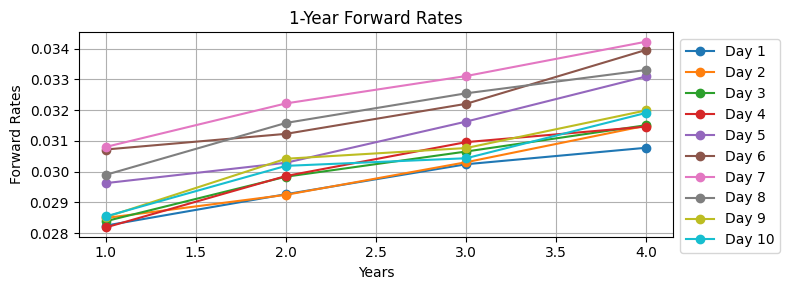

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Corresponding years for the x-axis (2026-2029, since forward rates are for t=1,2,3,4)
years = [1, 2, 3, 4]

plt.figure(figsize=(8, 3))

for day, rates in enumerate(forward_rates, start=1):
    plt.plot(years, rates, marker = 'o', label=f'Day {day}')

plt.xlabel('Years')
plt.ylabel('Forward Rates')
plt.title('1-Year Forward Rates')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

plt.savefig("forward_curve 1.pdf", bbox_inches='tight')

plt.show()

from google.colab import files
files.download("forward_curve 1.pdf")



In [ ]:
# interpolate yield rates for each year

yields = [[0.03097493625241832, 0.029734065098714964, 0.02915104746254897, 0.028452453776446444, 0.028654926037531343, 0.028744319138524488, 0.028713297272873875, 0.029061300981544316, 0.02929668797322551, 0.029608606173778296, 0.02978781853192751],
 [0.03132391232931775, 0.029681793853741915, 0.029304836038149935, 0.028608661137920766, 0.028821631523405826, 0.02901891234515967, 0.028708458971446492, 0.028945301949477354, 0.02943946896084765, 0.02978635246220941, 0.03022921760973838],
  [0.030985634365861693, 0.02994347792097243, 0.029459371550858926, 0.028576485459602036, 0.028891142458626156, 0.02909883961194274, 0.029095650205813464, 0.029370427968087583, 0.029706877669456247, 0.030009638463601638, 0.030377710634884134],
   [0.03206294558832311, 0.029733809495415858, 0.029252494056546632, 0.02841809781730588, 0.028667567153259188, 0.028944298038586006, 0.029025698448290376, 0.029511181192704038, 0.02977562759574065, 0.030142875731231495, 0.03035826443774915],
    [0.031725984055816066, 0.030632192951154272, 0.03022475883100214, 0.029523263005806797, 0.029863780019118956, 0.030161136165256255, 0.029676516440491674, 0.029938193202202475, 0.030618338127522914, 0.031025160507750824, 0.03158309679383784],
     [0.03372981035968912, 0.031125457982097732, 0.03033492457835404, 0.030193518717028855, 0.030472124241994032, 0.03072170015196966, 0.030520505597499786, 0.03079509347422093, 0.031204042591007404, 0.031726293031928206, 0.03233257466221482],
      [0.03419184497015482, 0.031238956451285015, 0.0314119341469677, 0.03060988506585773, 0.030939475503284013, 0.031159695141027954, 0.03131010965030398, 0.03165897934631958, 0.0319538810954624, 0.03236554911119808, 0.0328251045985691],
       [0.031436964370996814, 0.030705297464461347, 0.030562494428745503, 0.029750529484546682, 0.030122933894942604, 0.030452274046385227, 0.0305798698968854, 0.030994922202342495, 0.03131970518955872, 0.031746080760267664, 0.03201863439362686],
        [0.03104049812428456, 0.029679359230795916, 0.029617792841964297, 0.02863438476286247, 0.02896047091990377, 0.02927159465626005, 0.02945442567642729, 0.029555577242035152, 0.029909312822418866, 0.03042146786957026, 0.030664738222301837],
         [0.0297791720453653, 0.02929813404209323, 0.029222877650138857, 0.028410173201046218, 0.028784121122018086, 0.02915536374976811, 0.02921944269529019, 0.029266723896021113, 0.02965318683664576, 0.030146304232701353, 0.03051860766050702]]

total_interpolated_yields = []

for i in range(10):
  target = target_dates[i]
  interpolated = []
  for j in range(5):
    target_date = target[j]
    slope = (yields[i][2 * j + 2] - yields[i][2 * j + 1])/(maturity_dates[2 * j + 2] - maturity_dates[2 * j + 1]).days
    interpolated_yield = slope * (target_date - maturity_dates[2 * j + 1]).days + yields[i][2 * j + 1]
    interpolated.append(interpolated_yield)
  total_interpolated_yields.append(interpolated)

print(total_interpolated_yields)


[[0.02932498642582501, 0.028594519948588887, 0.028722672012493566, 0.02922646201990626, 0.029734351861540453], [0.029415215951002837, 0.028759270029313517, 0.02880057151089985, 0.029294768123264085, 0.03009953886488183], [0.02959845183398546, 0.028800743762773924, 0.029096578988917043, 0.029610218086742596, 0.030271966143686952], [0.029388113323852327, 0.028597274688432563, 0.02900244118837484, 0.02970111507333807, 0.030297574802211024], [0.03033730969292262, 0.029769714545828305, 0.029812316473255374, 0.030430452789036604, 0.031428970747957446], [0.03054020120805544, 0.030399779160925726, 0.030573567897579753, 0.031097851383886054, 0.03217514241567631], [0.0313679729646395, 0.030855712187695013, 0.03127126634296347, 0.0318789336896029, 0.032708311491281436], [0.030597997945912427, 0.030030347163076215, 0.03054762039620953, 0.031238958038040873, 0.03195087244058176], [0.02963275925692889, 0.028881201356866105, 0.029409220204407917, 0.02982332185260183, 0.0306056006779914], [0.029240756

In [ ]:
# Convert yields to a NumPy array
array_yields = np.array(total_interpolated_yields)

# Compute the 9x5 log-return matrix
log_returns_y = np.log(array_yields[1:] / array_yields[:-1])

# Compute the 5x5 covariance matrix
cov_matrix_y = np.cov(log_returns_y, rowvar=False)

# Print results
print("Log-return matrix (9x5):\n", log_returns_y)
print("\nCovariance matrix (5x5):\n", cov_matrix_y)


Log-return matrix (9x5):
 [[ 0.00307216  0.00574506  0.00270845  0.00233441  0.01220685]
 [ 0.00620997  0.00144106  0.01022538  0.01071057  0.00571222]
 [-0.00713177 -0.00708979 -0.0032406   0.00306508  0.0008456 ]
 [ 0.03178801  0.04018016  0.02754161  0.02425925  0.03666243]
 [ 0.00666559  0.02094376  0.02521423  0.02169489  0.02346408]
 [ 0.02674351  0.01488655  0.02256383  0.02480668  0.01643504]
 [-0.02485282 -0.02711345 -0.02341288 -0.02027943 -0.02342973]
 [-0.0320541  -0.03901753 -0.03797855 -0.04637527 -0.04301647]
 [-0.01331698 -0.00645817 -0.00700423 -0.00882208 -0.0057488 ]]

Covariance matrix (5x5):
 [[0.00046132 0.00048797 0.00045497 0.00046783 0.00048418]
 [0.00048797 0.00058224 0.00052241 0.00052717 0.00057791]
 [0.00045497 0.00052241 0.00050434 0.0005197  0.00053009]
 [0.00046783 0.00052717 0.0005197  0.00055368 0.00054874]
 [0.00048418 0.00057791 0.00053009 0.00054874 0.00059002]]


In [ ]:
eigenvalues_y, eigenvectors_y = np.linalg.eig(cov_matrix_y)

print("\nEigenvalues:\n", eigenvalues_y)
print("\nEigenvectors:\n", eigenvectors_y)



Eigenvalues:
 [2.59378489e-03 4.64489883e-05 4.12530814e-05 8.84759926e-06
 1.25478729e-06]

Eigenvectors:
 [[-0.40615688 -0.2996921   0.83808059 -0.17659758  0.10796043]
 [-0.46602014 -0.55483359 -0.29494314  0.27070181 -0.56099375]
 [-0.43705914  0.28952655 -0.0101207   0.73188116  0.43520252]
 [-0.45182708  0.70657659  0.03818754 -0.26770093 -0.47273643]
 [-0.47190403 -0.13881006 -0.45724037 -0.53686125  0.51063646]]


The eigenvalues are really close to zero.

In [ ]:
max_eigenvalue_y = np.max(eigenvalues_y)
print("Maximum eigenvalue:", max_eigenvalue_y)

sum_eigenvalue_y = sum(eigenvalues_y)
print(sum_eigenvalue_y)

weight_pc1_y = max_eigenvalue_y/sum_eigenvalue_y
print(weight_pc1_y)

# makes up 96.37%

Maximum eigenvalue: 0.0025937848947032854
0.002691589350911868
0.9636629353673702


In [ ]:
forward_rates = [
    [0.02824797679120783, 0.02926814870423855, 0.030241623734952316, 0.03077762721551891],
    [0.02849496951557695, 0.029248135191124014, 0.03030772655262659, 0.03149736458999719],
    [0.028391170138982957, 0.029837157451899854, 0.030655287673355014, 0.031512359275371216],
    [0.028187874130758628, 0.029860349431185318, 0.03096048241334315, 0.03146535980435994],
    [0.029628111448630978, 0.030290054511798115, 0.03162806901382087, 0.0330960807977978],
    [0.03072063817273296, 0.031229370043770466, 0.03220600157515974, 0.03396058908382993],
    [0.030804288381823364, 0.03221914808622284, 0.033108717352962946, 0.034226661651291845],
    [0.02989739730960861, 0.03158440898950898, 0.03254747972375749, 0.03330680969603561],
    [0.028522685890844945, 0.030420183350276853, 0.030768258060747122, 0.03199333997904774],
    [0.028546700430037486, 0.030189044030846768, 0.030436204823662827, 0.03191283078899865]
]

# Convert forward rates to a NumPy array
forward_rates = np.array(forward_rates)

# Compute the 9x4 log-return matrix
log_returns_f = np.log(forward_rates[1:] / forward_rates[:-1])

# Compute the 4x4 covariance matrix
cov_matrix_f = np.cov(log_returns_f, rowvar=False)

# Compute eigenvalues and eigenvectors
eigenvalues_f, eigenvectors_f = np.linalg.eig(cov_matrix_f)

# Print results
print("Log-return matrix (9x4):\n", log_returns_f)
print("\nCovariance matrix (4x4):\n", cov_matrix_f)
print("\nEigenvalues:\n", eigenvalues_f)
print("\nEigenvectors:\n", eigenvectors_f)


Log-return matrix (9x4):
 [[ 0.00870573 -0.00068403  0.00218344  0.02311584]
 [-0.00364938  0.01993869  0.01140248  0.00047595]
 [-0.0071863   0.00077698  0.00990647 -0.00149257]
 [ 0.04983173  0.01428793  0.02133336  0.05052762]
 [ 0.03621106  0.03053957  0.01810783  0.02578584]
 [ 0.00271923  0.03120194  0.02764379  0.00780421]
 [-0.02988248 -0.01989732 -0.01709667 -0.02724305]
 [-0.04707166 -0.0375573  -0.05621636 -0.04023412]
 [ 0.00084159 -0.00762724 -0.01085073 -0.00251961]]

Covariance matrix (4x4):
 [[0.00087996 0.00051728 0.00060508 0.00079332]
 [0.00051728 0.00053337 0.00055826 0.00046164]
 [0.00060508 0.00055826 0.00066823 0.00056635]
 [0.00079332 0.00046164 0.00056635 0.00075465]]

Eigenvalues:
 [2.49154967e-03 2.86519978e-04 1.46485988e-05 4.34998804e-05]

Eigenvectors:
 [[ 0.57048876  0.45078539  0.57852782 -0.36964938]
 [ 0.41110467 -0.57274051 -0.35236721 -0.61546618]
 [ 0.47853506 -0.52643056  0.33353918  0.61856825]
 [ 0.52587044  0.4377576  -0.65566342  0.31927112]]


In [ ]:
max_eigenvalue_f = np.max(eigenvalues_f)
print("Maximum eigenvalue:", max_eigenvalue_f)

Maximum eigenvalue: 0.0024915496708096466


In [ ]:
# chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://users.cs.utah.edu/~tch/CS4640F2019/resources/A%20geometric%20interpretation%20of%20the%20covariance%20matrix.pdf?utm_source=chatgpt.com
# eigenvalues represent the variance of data along the eigenvector directions
# https://builtin.com/data-science/step-step-explanation-principal-component-analysis
# the first principal component accounts for the largest possible variance in the dataset
# We first need to find the maximum eigenvalue
# If we divide this eigenvalue by the sum of eigenvalues we get how much variance the first component makes up

sum_eigenvalue_f = sum(eigenvalues_f)
print(sum_eigenvalue_f)

weight_pc1 = max_eigenvalue_f/sum_eigenvalue_f
print(weight_pc1)

0.0028362181282049256
0.8784760403412895


In [ ]:
# Makes up 87.84% of the variance